In [6]:
import numpy as np
import pandas as pd

import requests
import json,os,datetime
import csv
from pandas import DataFrame
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns #for beautiful plots
%matplotlib inline
import os

In [7]:
data = pd.read_csv('data/clean_data.csv')

In [8]:
data

,Absolute Magnitude,Est Dia in KM(min),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,16436,788947200000,6.115834,0.419483,17,5,0.025282,4.634,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.300,0.146068,16436,788947200000,18.113985,0.383014,21,3,0.186935,5.457,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.300,0.231502,16443,789552000000,7.590711,0.050956,22,0,0.043058,4.557,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.400,0.008801,16450,790156800000,11.173874,0.285322,7,6,0.005512,5.093,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.600,0.127220,16450,790156800000,9.840831,0.407832,25,1,0.034798,5.154,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,24357,1473318000000,22.154265,0.041361,4,8,0.019777,5.156,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,28.200,0.006089,24357,1473318000000,3.225150,0.006469,2,6,0.006451,5.742,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,22.700,0.076658,24357,1473318000000,7.191642,0.061009,17,6,0.059973,4.410,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,21.800,0.116026,24357,1473318000000,11.352090,0.260760,6,5,0.177510,4.477,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [9]:
labels = np.array(data['Hazardous'])

In [10]:
labels

array([ True, False,  True, ..., False, False, False])

In [11]:
y = [1 if L else 0 for L in labels]

In [12]:
X = data.drop(columns=['Hazardous'])

In [13]:
data.keys()

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

OK, ahora tenemos los features y las etiquetas por separado.
Armemos los conjuntos de datos de entrenamiento, validación y test.m

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [17]:
model = LogisticRegression(solver='lbfgs')

In [19]:
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)

In [23]:
lr_probs

array([[0.89226839, 0.10773161],
       [0.82866278, 0.17133722],
       [0.82638009, 0.17361991],
       ...,
       [0.85546719, 0.14453281],
       [0.7688163 , 0.2311837 ],
       [0.80778968, 0.19221032]])

In [25]:
probas = lr_probs[:,1]

In [26]:
from sklearn.metrics import roc_curve

In [27]:
a, b, c = roc_curve(testy, probas)

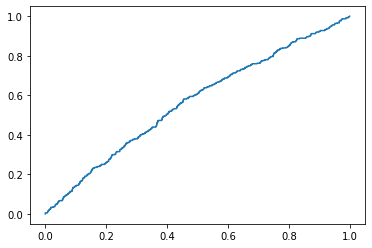

In [28]:
plt.plot(a, b)